<a href="https://colab.research.google.com/github/ShashwatPatel107/Flask_Personal_Portfolio/blob/main/DVA_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis Project on GOOGLE PLAYSTORE APPS using Python



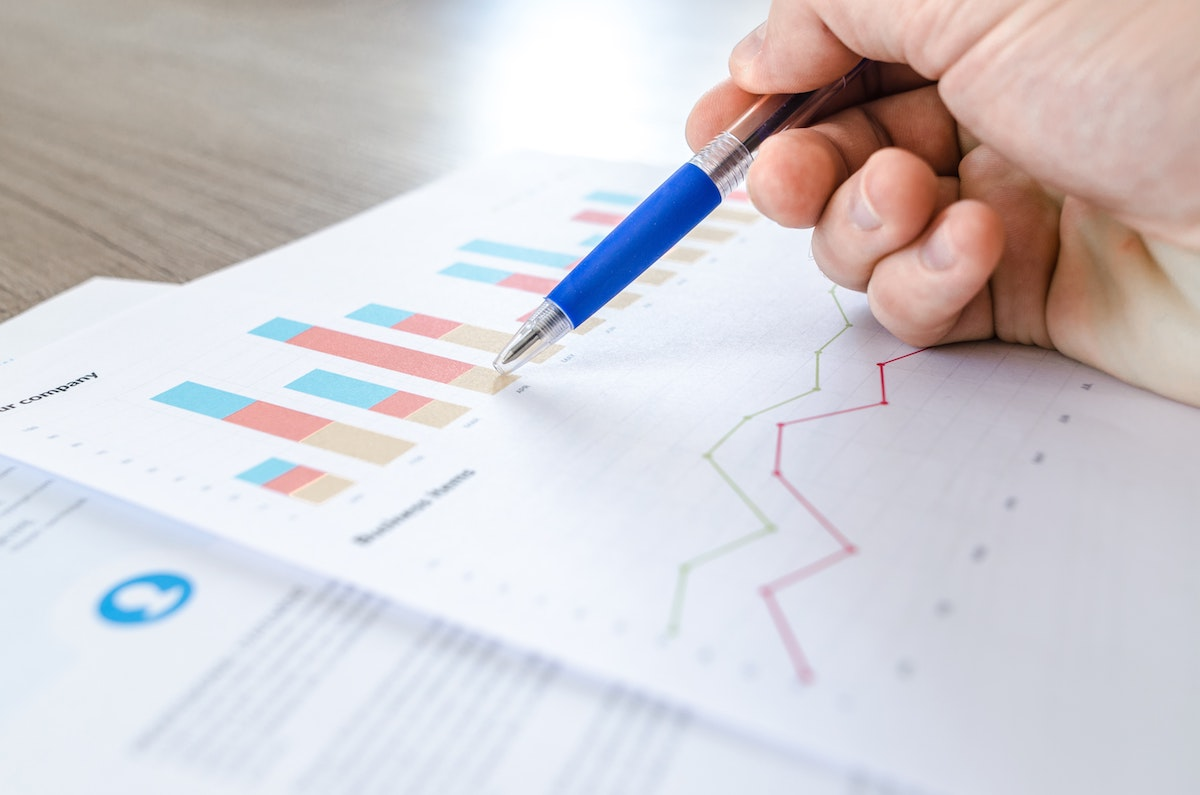

# INTRODUCTION

### What is Data Analysis. 

Data analysis is the process of examining, cleaning, transforming, and modeling data with the goal of discovering useful information, suggesting conclusions, and supporting decision-making. It involves using statistical and computational techniques to uncover patterns, relationships, and trends within data.

### What is Data Visualization?
Data Visulization is a graphical representation of a given information and data. Visulization tools like charts Graphs and maps, it provides an excellent way for employees or business owners to present data to non-technical audiences without confusion by see and understand trends, outliers, and patterns in data.

### About Google/Android/Playstore
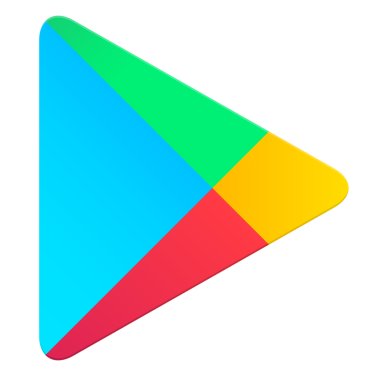


Google:

Google is a USA based Tech company.
It is referred as "The most powerful company in the world." It has multiple domain in different Search Engine, AI, Mobile OS, Advertising, Cloud and so much more.

Android:

Android is Open-Source Linux kernal modified based Mobile Operationg Syatem. It's main device is Smartphones but not limited to Smartphones.

Playstore:

Playstore is serves as the official app store for certified devices running on the Android operating system. It released on Oct/22/2008.

* 6.8 Billion smartphones are in the world.
* Playstore have 2.7M apps
* 70% Downloads of total Mobile Apps by Playstore.  


###   what this the Purpose of the project?

Purpose of the project is to extract meaningful insights and information from data through visual representations. By visualizing data, patterns, relationships, and trends become easier to see and understand. This can lead to more informed decision-making, improved communication, and increased understanding of the data.

In this project will analysis and visualize data of different apps that has been downloaded from google Play Store. Exploring and discovering new insights and relationships within data. Identifying areas for improvement or optimization.
By the Analysis and Visualization developer and business Community might get batter insite of the Consumer’s mindset and able to create more useful and profitable apps. 

### Outline
Steps for Data Visulization and Analysis

1. Gather Dataset
  * opendata

2. Create DataFrame
  * Pandas

3. Data Cleaning

4. Data Analysis

5. Create Visulization
  * Matplotlib
  * Seaborn
  * Plotly.express

### Sample output 

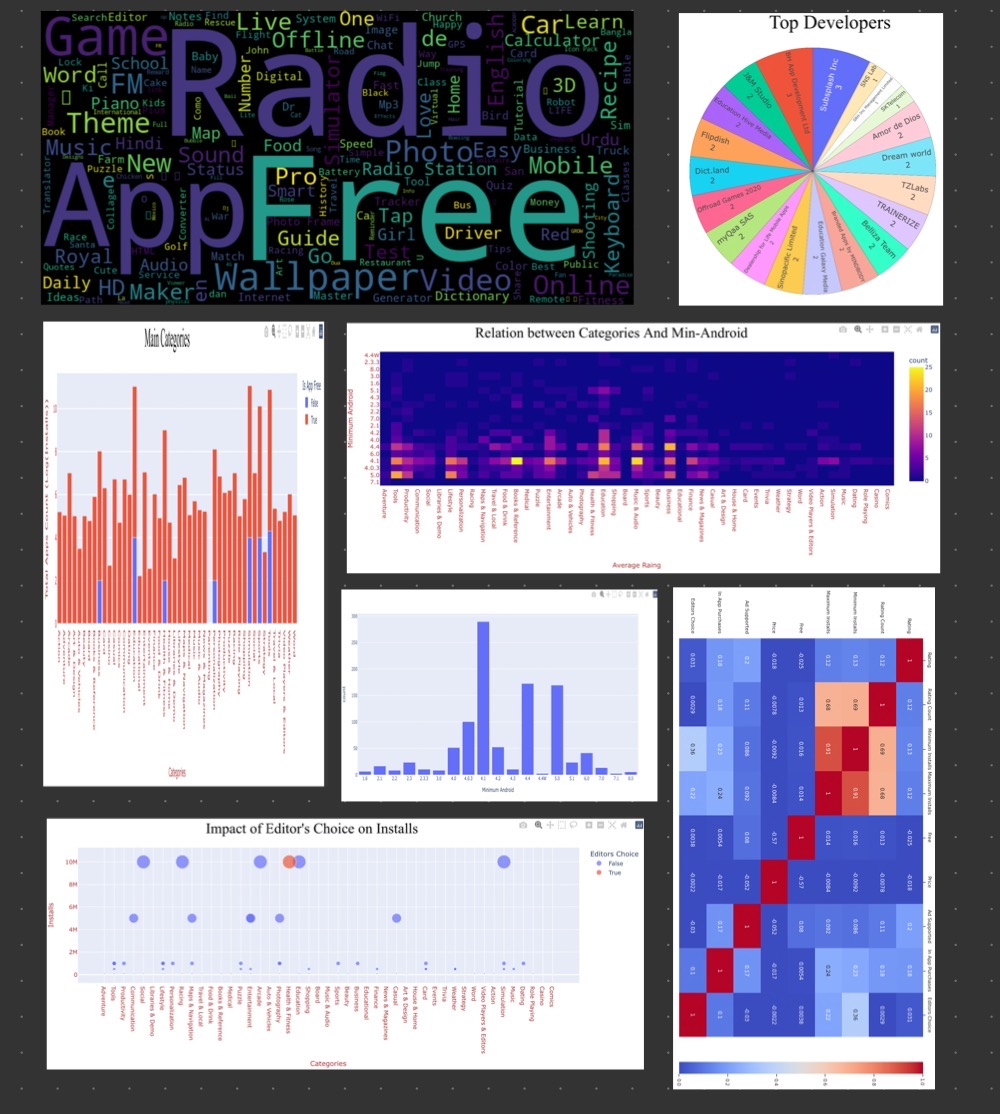

# STEP_1 DATA COLLECTION 
(IMPORTING FILES)

## Downloading Dataset

In [ ]:
# Download Dataset from internet
! pip install opendatasets --quiet
import opendatasets as od 
dataset_url = 'https://www.kaggle.com/datasets/gauthamp10/google-playstore-apps'
od.download(dataset_url)

## Preparing DataFrame

In [3]:
# Importing Necessary Libraries
import pandas as pd
import glob
import numpy as np
import plotly.express as px

In [4]:
df_url = "/content/google-playstore-apps/Google-Playstore.csv"

In [ ]:
# Creating List of Columns
lists = ["App Name", "Category", "Rating","Rating Count",
         'Installs', 'Free', 'Price', 'Size', 'Minimum Android',
         'Developer Id', 'Released', 'Content Rating', 'Editors Choice']

# Create new dataframe with only necessary columns         
df = pd.read_csv(df_url, usecols= lists )

# Add Addition columns for coorelation graph
cor_df = pd.read_csv(df_url)

In [ ]:
# # replace +
df["Installs"] = df["Installs"].str.replace("+","") # removed + from behind
df['Installs'].replace(',','', regex=True, inplace=True) #replace the commas ',' in the install column
df['Installs'] = df['Installs'].astype(float)              # converting it to the int type

df["Installs"]

In [7]:
# Convert Datatype of columns
selected_dtypes = {"Rating" : "float32",
                  "Price" : "float32",
                  "Content Rating": "category",
                  "Minimum Android": "category",
                  "Category": "category",
                  "Rating": "category",
                  }

df = df.astype(selected_dtypes)                

In [ ]:
# Convert CSV to feather for faster access
df.to_feather("df.feather")
df_feather = pd.read_feather("df.feather")

cor_df.to_feather("cor_df.feather")
cor_df_feather = pd.read_feather("cor_df.feather")

Comment Out for full Dataframe

In [9]:
# Start working with 1000 rows of data to save loading time
df = df_feather.head(1000)
cor_df = cor_df_feather.head(1000)

# STEP_2 DATA REFINEMENT
DATA MUNGING/ CLEANING

In [ ]:
# Total Missing Values By column 

"""
App Name --------------2 
Category               0
Rating             22883 
Rating Count ----- 22883 
Installs             107 
Free                   0
Price                  0
Size                 196 
Minimum Android     6530 
Developer Id          33 
Released           71053 
Content Rating         0
Editors Choice         0
"""

In [ ]:
# Remove columns where App Name is missing
df.dropna(subset= ["App Name"], axis = 0, how = "any", inplace = True)

In [ ]:
# Fill Average values for missing values in Rating column,
df["Rating Count"].fillna(value = (df["Rating Count"].mean()), inplace = True)

In [17]:
# Installs
df["Installs"].fillna(method = "ffill", inplace =True)

In [19]:
# Size
df["Size"].fillna(value = "ffill", inplace = True)

In [22]:
# Rating
df["Rating"].fillna(value = 4.5, inplace = True)

In [24]:
# Fill minimum values for missing values in Mininum Android
df["Minimum Android"].fillna(value = "4.1 and up", inplace = True)

In [ ]:
df['Minimum Android'] = df['Minimum Android'].apply(lambda x: str(x).replace('Varies with device', '4.1 and up') if 'Varies with device' in str(x) else x)
df['Minimum Android'] = df['Minimum Android'].apply(lambda x: str(x).replace(' and up', '') if ' and up' in str(x) else x)

In [26]:
# Fill "Others" in Developer Id missing values
df["Developer Id"].fillna(value = "Others", inplace = True)

In [27]:
# Fill above date in missing values for Released Column
df["Released"].fillna(method = "ffill" ,inplace = True)

In [ ]:
# Remove "+" from Installs and conver to Integer
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else x)
df['Installs'].replace(',','', regex=True, inplace=True) #replace the commas ',' in the install column
df['Installs'] = df['Installs'].astype(int)              # converting it to the int type

# STEP_3 DATA ANALYSING

The Dataset have **rows** and **13 columns**

Columns:

['App Name', 'Category', 'Rating', 'Rating Count', 'Installs', 'Free', 'Price', 'Size', 'Minimum Android','Developer Id', 'Released','Content Rating', 'Editors Choice']

Questions that needs to be asked


1. Who are the top developers?
2. Which category have highest apps?
3. Which category have highest rating apps?  
4. Which are the top App category by downloads?
5. Does Rating Matters in downloads?
6. Does Money affect Downloads?
7. Does Editor's Choice have any impact on Downloads?
8. Does Size of the app matters?
9. How many apps released every year?
10. What is the Base line Android version?

# STEP_4 DATA VISUALIZATION

In [31]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

## 1 Word cloud
Which word appear most in App Name

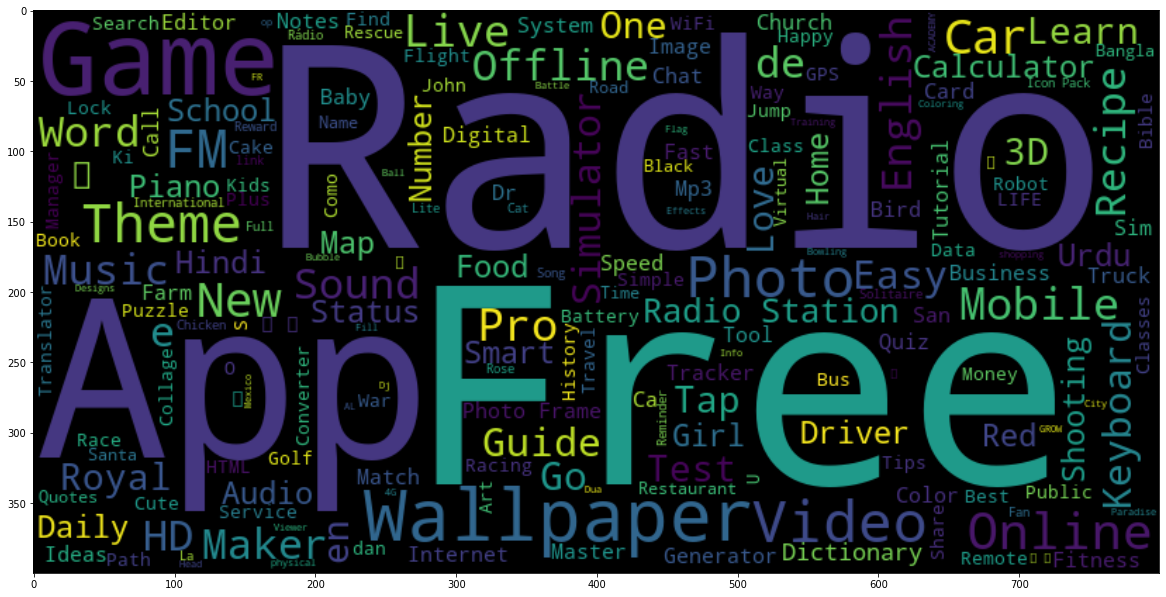

In [32]:
# Create a single string with words in App Name
name = df["App Name"]
words = ' '.join((job for job in name.dropna().str.replace(';', ' ').str.replace(',', ' ')))

wc = WordCloud( width=800, height=400, background_color='black', ).generate(words)

plt.figure(figsize=(16,9))
plt.imshow(wc, interpolation='bilinear');
plt.axis =("off")
plt.tight_layout(pad=0)
plt.grid(False)

plt.show()

## 2 Who are the top developers
Based on the number of Apps they released.

In [33]:
# Top Developer 
dev_df = df.groupby(by = df["Developer Id"])['App Name'].count().reset_index().sort_values(by='App Name',ascending=False)
dev_df.columns= ['Developer','App Count']

fig_top_dev = px.pie(dev_df[:20],
               values = "App Count",
               names = "Developer")

fig_top_dev.update_layout(title = "Top Developers",  title_x=0.45,
                    title_font_family="Times New Roman",
                    title_font_color="black",
                    title_font_size= 30,
                    legend_title = "Developers")

fig_top_dev .update_traces(textposition='inside', textinfo='value+label',
                      marker=dict(line=dict(color='#000000', width=0.1))
                      )


fig_top_dev.show()

## 3 Which category has the highest number of apps?



In [34]:
# Category with most apps
categoty_installs = df.groupby(['Category','Free'])[['Installs']].sum().reset_index()
categoty_installs['count_Installs'] = np.log10(categoty_installs['Installs'])

fig_cat_mapp = px.bar(categoty_installs, x = 'Category', y = 'count_Installs',
               color= "Free", hover_name ="Installs"
              )

               
fig_cat_mapp.update_layout(title = "Main Categories",  title_x=0.45,
                    title_font_family="Times New Roman",
                    title_font_color="black",
                    title_font_size= 30,
                    xaxis_title = "Categories",
                    yaxis_title = "Total Apps Count (Log(Installs))",
                     legend_title = "Is App Free",

                    )

fig_cat_mapp.update_xaxes(color='brown')
fig_cat_mapp.update_yaxes(color='brown')
  

fig_cat_mapp.show()

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning:

divide by zero encountered in log10



Ans 3: Education and Tools are the catogaries who has the most number of Apps
Since the Covid-19 hits the world people are trap into their house. Basic priority apps gets most Installs. No wonder why Education have such high numbers.

## 4  Which category have highest rating Apps?

In [35]:
fig_cat_hi_rat = px.bar(df, x="Category", y= "Rating Count", color="Rating",
               hover_name ="App Name")

              
fig_cat_hi_rat.update_layout(title = "Highest Rating Counts Categories",  title_x=0.45,
                    title_font_family="Times New Roman",
                    title_font_color="black",
                    title_font_size= 30,
                    xaxis_title = "Categories",
                    yaxis_title = "Rating Counts",
                    legend_title = "Rating Average",

                    )

fig_cat_hi_rat.update_xaxes(color='brown')
fig_cat_hi_rat.update_yaxes(color='brown')


fig_cat_hi_rat.show()

Ans 4: Tools and Simulation are few of the top rating Apps category On App Store

## 5: Which are the top App categories by downloads

In [36]:
fig_most_ins = px.scatter(df, x= "Category", y= "Installs",
                          color = "Free",
                          size = "Installs",
                          hover_name = "App Name",
                          )

fig_most_ins.update_layout(title = "Most Downloaded Categories", title_x=0.5,
                    title_font_family="Times New Roman",
                    title_font_color="black",
                    title_font_size= 30,
                    xaxis_rangemode= "tozero",
                    yaxis_title = "Installs",
                    xaxis_title = "Categories",)


fig_most_ins.update_xaxes(color='brown')
fig_most_ins.update_yaxes(color='brown')

fig_most_ins.show();

Ans 5: Education, Social, Racing Games, Arcade, Helth& Fitness are few of the top Downloads categories on playstore.

## 6 Does Rating Matter to Downloads?

In [37]:
# rating affects Downloads
fig_rat_down = px.scatter(df, x="Rating", y = "Installs",
                          size = "Installs",
                          color = "Rating Count",
                          hover_name = "App Name")


fig_rat_down.update_layout(title = "Are App Ratings Important?", title_x=0.5,
                    title_font_family="Times New Roman",
                    title_font_color="black",
                    title_font_size= 30,                    
                    xaxis_rangemode= "tozero",
                    yaxis_title = "Installs",
                    xaxis_title = "Rating (Out of 5)",)


fig_rat_down.update_xaxes(color='brown')
fig_rat_down.update_yaxes(color='brown')


fig_rat_down.show()

Ans 6: Most of the highest installed Apps have higher ratings. and somewhat higher Rating Counts as well.  Good Apps more Downloads. 

## 7 Does Money affect downloads?

In [38]:
# Money Talks
money_df = df.sort_values(by =["Installs"])

fig_mon_down = px.scatter(money_df, x="Price", y = "Installs",
                   color="Price",
                   hover_name= "App Name",
                    )

fig_mon_down.update_layout(title = "Does Money Matter?",  title_x=0.5,
                    xaxis_title = "Price (US $)",
                    yaxis_title = "Downloads (Millions)",
                    title_font_family="Times New Roman",
                    title_font_color="black",
                    title_font_size= 30, 
                    )

fig_mon_down.update_xaxes(color='brown')
fig_mon_down.update_yaxes(color='brown')
  
fig_mon_down.show()

Ans 7: Free Apps do have significantly more Downloads compared to Paid.

## 8 Does Editor's choice make any difference on Downloads?

In [39]:
# Editor
editor_df =df[["Installs", "Category", "Editors Choice"]].copy()
editor_df.sort_values(by = "Installs")
df["Editors Choice"].value_counts()


fig_editor = px.scatter(editor_df, x= "Category", y= "Installs",
                   color="Editors Choice",
                   size = "Installs",
                   )

              
fig_editor.update_layout(title = "Impact of Editor's Choice on Installs",  title_x=0.45,
                    title_font_family="Times New Roman",
                    title_font_color="black",
                    title_font_size= 30,
                    xaxis_title = "Categories",
                    yaxis_title = "Installs",
                    legend_title = "Editors Choice",
                    )

fig_editor.update_xaxes(color='brown')
fig_editor.update_yaxes(color='brown')


fig_editor.show()

Ans 8: Editor's Choice have overall higher average downloads then  Normal Apps

## 9 Does Size of the App have any impact on Downloads?

In [ ]:
# convert Size into MB only there are few in kB. 
# convert to Integer
import numpy as np

df['Size'] = df['Size'].apply(lambda x: str(x).replace('Varies with device', "24M") if 'Varies with device' in str(x) else x);
df['Size'] = df['Size'].apply(lambda x: str(x).replace('M',"") if 'M' in str(x) else x);
df['Size'] = df['Size'].apply(lambda x: str(x).replace(',', "")  if ',' in str(x) else x);
df['Size'] = df['Size'].apply(lambda x: int((str(x).replace('k', '0')))/10000 if 'k' in str(x) else x);

df['Size'] = df['Size'].apply(lambda x: float(x));

In [82]:
df_10 = df[["Size", "Installs", "Free"]].sort_values(by = "Size")
fig_size_down = px.scatter(df_10,
                    x = "Size",
                    y="Installs",
                    color ="Free",
                    hover_name = df["App Name"]
                    )

fig_size_down.update_layout(title = "Does Size have Impact on Installs",
                     title_x=0.45,
                     title_font_family="Times New Roman",
                     title_font_color="black",
                     title_font_size= 30,
                    xaxis_title = "Size of Apps(MB)",
                    )

fig_size_down.update_xaxes(color='brown')
fig_size_down.update_yaxes(color='brown')


fig_size_down.show()

Ans: Higher downloaded apps have smaller sizes.

## 10 How many apps release Every year

In [43]:
# total apps in year

year_Inst_df = df[["Released"]].head(1000);

year_Inst_df["Released"].fillna(method= "ffill", inplace = True); 
year_Inst_df["Released"] = pd.to_datetime(year_Inst_df["Released"]);
year_Inst_df["Year"] = year_Inst_df["Released"].apply(lambda x: str(x).split('-')[0] if '-' in str(x) else x);
year_Inst_df["Year"] = year_Inst_df["Year"].sort_values(ascending = False);


fig_year_hist = px.histogram(year_Inst_df["Year"])

fig_year_hist.update_layout(title = "Apps Released By Year",
                            title_x=0.45,
                            title_font_family="Times New Roman",
                            title_font_color="black",
                            title_font_size= 30,
                            xaxis_title = "Year of Released",
                            yaxis_title = "No. of Apps",
                            legend_title = "Year"
                            )

fig_year_hist.update_xaxes(color='brown')
fig_year_hist.update_yaxes(color='brown')

fig_year_hist.show()

## 11 Which Android is most common baseline Android OS



In [91]:
df_min_and = df["Minimum Android"].sort_values()
fig_min_and = px.histogram(df_min_and, "Minimum Android")

fig_min_and.update_layout(title = "Base Android",
                            title_x=0.45,
                            title_font_family="Times New Roman",
                            title_font_color="black",
                            title_font_size= 30,
                            xaxis_title = "Android Version",
                            yaxis_title = "No. of Apps",
                            )

fig_min_and.update_xaxes(color='brown')
fig_min_and.update_yaxes(color='brown')

fig_min_and.show()

Ans: Developer prefer to baseline Android as 4.1. (Jelly Bean)

## 12 Some correlation among variables
min_android, Category

In [45]:
fig_corr_dens =px.density_heatmap(df, x='Category', y='Minimum Android')


fig_corr_dens.update_layout(title = "Relation between Categories And Min-Android",  title_x=0.45,
                    title_font_family="Times New Roman",
                    title_font_color="black",
                    title_font_size= 30,
                    xaxis_title = "Average Raing",
                    )

fig_corr_dens.update_xaxes(color='brown')
fig_corr_dens.update_yaxes(color='brown')


fig_corr_dens.show();

Ans : Since Android 4.1 is base for many Apps number of rating is also high for the apps. 

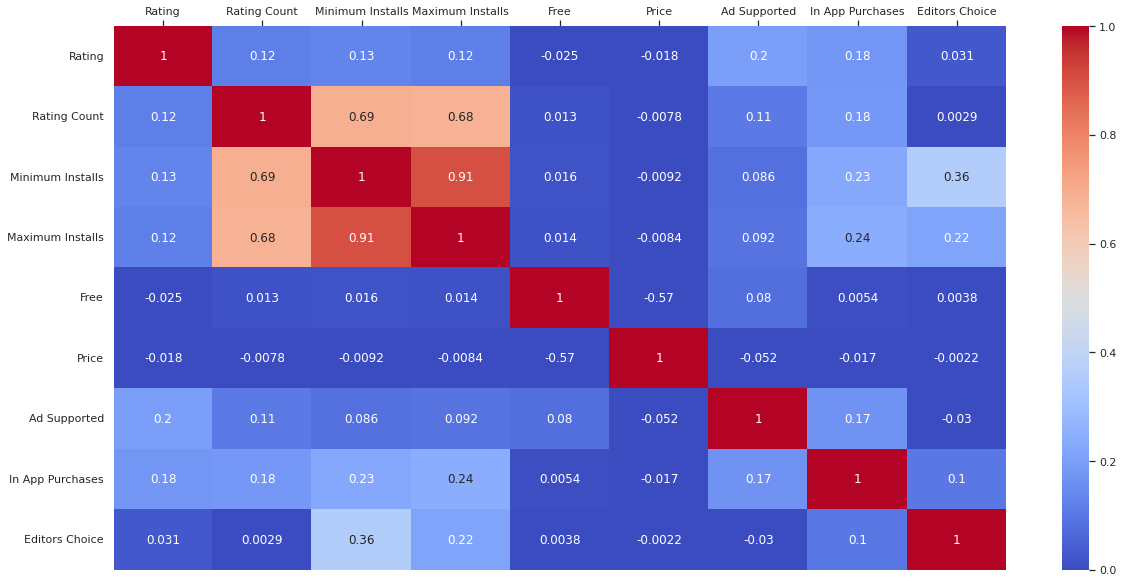

In [90]:
# corr Heatmap
cor_df.corr()
fig_corr_heat = sns.heatmap(cor_df.corr(),                 
                 cbar= True,
                 cmap='coolwarm',
                 vmin = 0,
                 vmax = 1,
                 annot=True,                 
                 )

sns.set(rc={'figure.figsize':(20,10)})
fig_corr_heat.xaxis.tick_top()
fig_corr_heat;

From Above's corelation chart, we can easily conclude that "In-App Purchases" and "Ad support" have impact on Installs and ratings. 

Installs also depands on Rating counts and Editor's choice.  And Money is not kind of matter with any of the other factors. 

# CONCLUSION

In conclusion, the data visualization and analysis project on Google Playstore apps has provided valuable insights into the app market on the platform. Our analysis revealed the most popular categories of apps, the average ratings and size of apps, and the distribution of installs by price. Furthermore, we also explored the relationship between app ratings and installs, and found that higher rated apps tend to have more installs. These findings can be useful for app developers and marketers as they plan their app strategy, as well as for users who want to find high-quality apps. However, it's important to note that the data used in this analysis only represents a snapshot of the app market on Google Playstore, and there may be other factors that affect app success. Nevertheless, data visualization and analysis continue to play a crucial role in understanding and improving the app market.

## SUMMARY

millions of rows of data and Multiple charts shows someting intresting about the Apps that consumer like to install.

Prople are installing few basic categories Apps often, Education, Gaming, Social etc.

Highly rated Apps seems more downloads. 

In-App purchase and Ad support have close relation with Downloads.

Last couple of years App development seen a boom. Human become more depandent on tech ever then before. 

## FUTURE WORK

*   Work with Live data from DBMS like SQL
*   create Intractive 3D charts
*   create Animated chart
*   add graph Object

## RESOURCES

*   [Kaggle DATASET](https://www.kaggle.com/datasets/gauthamp10/google-playstore-apps)
*   [Google](https://www.google.com/)
* [w3school](https://www.google.com/search?q=w3school+pandas&oq=&aqs=chrome.1.69i57j69i59l3j69i60l4.7770j0j4&sourceid=chrome&ie=UTF-8)
* [Jovian](https://jovian.com/learn/zero-to-data-analyst-bootcamp/lesson/advanced-data-analysis-techniques)
* [Pandas](https://pandas.pydata.org/docs/reference/frame.html)
* [Seaborn](https://seaborn.pydata.org/examples/index.html)
* [matplotlib](https://matplotlib.org/stable/plot_types/index)
* [plotly](https://plotly.com/python/)
* [Inspired by](https://www.linkedin.com/pulse/my-first-exploratory-data-analysis-project-dr-ragini-selukar/)


